In [28]:
import pandas as pd

# 1) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [7]:
import numpy as np
from scipy import stats

In [29]:
mean = 90
standard_d = 15
size = 40
office_one = stats.norm(mean, standard_d).rvs(size)

mean = 100
standard_d = 20
size = 50
office_two = stats.norm(mean, standard_d).rvs(size)

In [30]:
alpha = .05

stat, pval = stats.levene(office_one, office_two)
stat, pval

(5.260061244133331, 0.02420270639975342)

In [ ]:
if pval < alpha:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

In [ ]:
stat, pval = stats.ttest_ind(office_one, office_two, equal_var=False)
stat, pval

In [ ]:
if pval < alpha:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

## 2) Load the mpg dataset and use it to answer the following questions:
## a) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [33]:
from pydataset import data

In [34]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
mpg = mpg.rename(columns = {'cyl': 'cylinders', 'trans': 'transmission', 'cty': 'city', 'hwy':'highway', 'fl': 'fuel type'})
mpg.head()

In [ ]:
mpg['average_efficiency'] = mpg['city'] + mpg['highway'] / 2
mpg

In [ ]:
ninety_nine = mpg[mpg['year'] == 1999].average_efficiency
ninety_nine.hist()

In [ ]:
oh_eight = mpg[mpg['year'] == 2008].average_efficiency
oh_eight.hist()

In [ ]:
nn_mean = ninety_nine.mean()
oe_mean = oh_eight.mean()

nn_mean, oe_mean

In [ ]:
import scipy.stats as stats
alpha = .05

# H0 = the means are not meaningfully different
# Ha = the means are meaningfully different

In [ ]:
stat, pval = stats.levene(ninety_nine, oh_eight)

In [ ]:
stat, pval

In [ ]:
if (pval < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

# b) Are compact cars more fuel-efficient than the average car?

In [ ]:
overall_average_eff = mpg['average_efficiency'].mean()
overall_average_eff

In [ ]:
compact_efficiency = mpg[mpg['class'] == 'compact'].average_efficiency

In [ ]:
alpha = .05

In [ ]:
test, pval = stats.ttest_1samp(compact_efficiency, overall_average_eff)
test, pval

In [ ]:
if test > 0 and pval/2 < alpha:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

# c) Do manual cars get better gas mileage than automatic cars?

In [31]:
mask = mpg['transmission'].str.contains('auto')
mpg['transmission'] = mpg['transmission'].where(~mask, 'auto')

mask = mpg['transmission'].str.contains('manual')
mpg['transmission'] = mpg['transmission'].where(~mask, 'manual')

mpg.head()

NameError: name 'mpg' is not defined

In [ ]:
autos = mpg[mpg['transmission'] == 'auto'].average_efficiency
manuals = mpg[mpg['transmission'] == 'manual'].average_efficiency

In [ ]:
print(autos.mean())
manuals.mean()

In [ ]:
alpha = .05

stat, pval = stats.levene(manuals, autos)
stat, pval

In [ ]:
if (stat < 0) and (pval < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?

Do guys and gals quit their jobs at the same rate?

Does the length of time of the lecture correlate with a students grade?

Use the telco_churn data.

In [11]:
churn = pd.read_csv('modified_telco.csv')
churn.head()

from env import hostname, user, password

def get_db_url(user, hostname, password, db_name):
    return(f'mysql+pymysql://{user}:{password}@{hostname}/{db_name}')



In [12]:
url = get_db_url(user, hostname, password, 'telco_churn')
query = 'SELECT * FROM customers'

df = pd.read_sql(query, url)

In [ ]:
df.head()

In [ ]:
r, p = stats.pearson

Does tenure correlate with monthly charges?

In [ ]:
df

In [ ]:
from scipy import stats

In [ ]:
type(df.total_charges)

In [ ]:
cor, p = stats.pearsonr(df.tenure, df.monthly_charges)
cor, p

Total charges?

In [ ]:
new_df = df[df['total_charges'] != ' ']
new_df['total_charges'] = new_df['total_charges'].astype('float')

$H_0$: There is not a meaningful relationship between tenure and monthly charges

$H_A$: There is a meaningful relationship and monthly charges

In [ ]:
alpha = .05

cor, p = stats.pearsonr(new_df.tenure, new_df.total_charges)
cor, p

In [ ]:
if alpha < p:
    print('We fail to reject the null hypothesis')
else:
    print('We can reject the null hypothesis')

What happens if you control for phone and internet service?

In [ ]:
df.phone_service.unique()

In [ ]:
no_phone = new_df[new_df['phone_service'] == 'No']

$H_0$: There is not a meaningful relationship between tenure and monthly charges

$H_A$: There is a meaningful relationship and monthly charges

In [ ]:
alpha = .05

cor, p = stats.pearsonr(no_phone.tenure, no_phone.total_charges)
cor, p

if alpha < p:
    print('We fail to reject the null hypothesis')
else:
    print('We can reject the null hypothesis')

In [ ]:
yes_phone = new_df[new_df['phone_service'] == 'Yes']

In [ ]:
alpha = .05

cor, p = stats.pearsonr(yes_phone.tenure, yes_phone.total_charges)
cor, p

if alpha < p:
    print('We fail to reject the null hypothesis')
else:
    print('We can reject the null hypothesis')

In [ ]:
id_one = new_df[new_df['internet_service_type_id'] == 1]

In [ ]:
alpha = .05

cor, p = stats.pearsonr(id_one.tenure, id_one.total_charges)
cor, p

if alpha < p:
    print('We fail to reject the null hypothesis')
else:
    print('We can reject the null hypothesis')

In [ ]:
id_two = new_df[new_df['internet_service_type_id'] == 2]

In [ ]:
alpha = .05

cor, p = stats.pearsonr(id_two.tenure, id_two.total_charges)
cor, p

if alpha < p:
    print('We fail to reject the null hypothesis')
else:
    print('We can reject the null hypothesis')

In [ ]:
id_three = new_df[new_df['internet_service_type_id'] == 3]

In [ ]:
alpha = .05

cor, p = stats.pearsonr(id_three.tenure, id_three.total_charges)
cor, p

if alpha < p:
    print('We fail to reject the null hypothesis')
else:
    print('We can reject the null hypothesis')

Use the employees database.

In [13]:
url = get_db_url(user, hostname, password, 'employees')
query = 'SELECT * FROM employees'

url1 = get_db_url(user, hostname, password, 'employees')
query1 = 'SELECT * FROM salaries'

employees = pd.read_sql(query, url)
salaries = pd.read_sql(query1, url1)
employees.head()
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [14]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [15]:
employees = pd.merge(employees, salaries, on='emp_no')
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25
...,...,...,...,...,...,...,...,...,...
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,63707,1997-11-30,1998-11-30
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,67043,1998-11-30,1999-11-30
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,70745,1999-11-30,2000-11-29
2844045,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,74327,2000-11-29,2001-11-29


In [16]:
employees['to_date'] = employees['to_date'].astype(str)

employees = employees[~employees['to_date'].str.contains('9999')]

In [17]:
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25
...,...,...,...,...,...,...,...,...,...
2844040,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,51182,2000-12-25,2001-12-25
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,63707,1997-11-30,1998-11-30
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,67043,1998-11-30,1999-11-30
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,70745,1999-11-30,2000-11-29


In [27]:
employees['to_date'] = employees['to_date'].astype(timestamp)
employees['tenure'] = employees['to_date'] - employees['hire_date']
employees



NameError: name 'timestamp' is not defined

In [ ]:
χ

In [23]:
test = employees.groupby(employees.emp_no).from_date.min()
test

emp_no
10001     1986-06-26
10002     1996-08-03
10003     1995-12-03
10004     1986-12-01
10005     1989-09-12
             ...    
499995    1997-06-02
499996    1996-05-13
499997    1987-08-30
499998    1993-12-27
499999    1997-11-30
Name: from_date, Length: 300024, dtype: object

Is there a relationship between how long an employee has been with the company and their salary?

$H_0$: There is not a meaningful relationship between an employee's tenure and their salary

$H_A$: There is a meaningful relationship between an employee's tenure and their salary

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Use the sleepstudy data.

In [ ]:
from pydataset import data
sleep = data('sleepstudy')
sleep

Is there a relationship between days and reaction time?

In [37]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [38]:
type(mpg.manufacturer[1])

str

In [ ]:
def which_stat_test(colone, coltwo)
    if type(colone[1]) == 'str' and type(coltwo[1]) == 'str':
        

In [44]:
import numpy as np
import matplotlib.pyplot as plt

A manufacturing company claims that the average lifespan of their light bulbs is at least 10,000 hours. You randomly select 50 light bulbs and find that their average lifespan is 9,800 hours with a standard deviation of 200 hours. Test the company's claim using a significance level of 0.05.


In [47]:
np.random.seed(123)

sample = np.random.normal(9800, 200, 50)

(array([ 2.,  1.,  4.,  6., 10.,  7.,  6.,  7.,  3.,  4.]),
 array([ 9240.28217891,  9344.10126634,  9447.92035376,  9551.73944119,
         9655.55852862,  9759.37761605,  9863.19670348,  9967.0157909 ,
        10070.83487833, 10174.65396576, 10278.47305319]),
 <BarContainer object of 10 artists>)

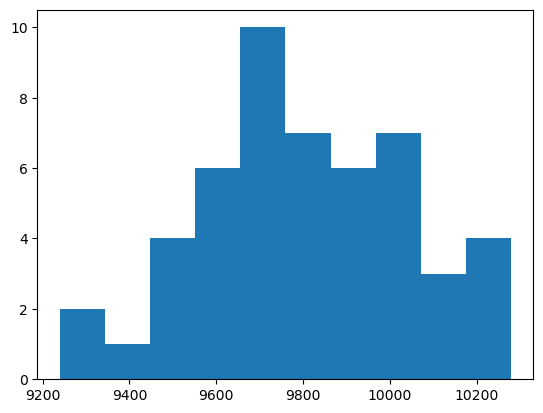

In [50]:
plt.hist(sample)

In [53]:
t, p = stats.ttest_1samp(sample, 10000)
t, p

(-5.806125967797772, 4.649268091807646e-07)

In [55]:
alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis. There is evidence to support the claim that the average lifespan is less than 10000 hours.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to support the claim that the average lifespan is less than 10000 hours.")

Reject the null hypothesis. There is evidence to support the claim that the average lifespan is less than 10000 hours.


A university wants to determine if there is a difference in the average test scores of students who attended a tutoring program versus those who did not. They randomly select two groups of students: Group A (tutoring program attendees) and Group B (non-attendees). The test scores of the two groups are as follows:
Group A: [85, 89, 90, 91, 93]
Group B: [78, 82, 88, 90, 92]

In [60]:
alpha = .01

group_a = [85, 89, 90, 91, 93]
group_b = [78, 82, 88, 90, 92]

In [63]:
s, p = stats.levene(group_a, group_b)

#t, p = stats.ttest_ind(group_a, group_b)
s, p

(1.5319148936170213, 0.25091713765155527)

In [59]:
if p < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis. There is not enough evidence to support the claim that the average lifespan is less than 10000 hours.


Research Question: Is there a relationship between income and education level among working professionals? Analyze the data collected from a survey of 500 working professionals to determine if there is a significant correlation between their income and education level.

Income (in thousands of dollars): [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
Education Level (in years): [10, 12, 11, 14, 16, 12, 14, 13, 15, 16, 14, 13, 12, 15, 17, 16, 18, 14, 16, 15, 13, 12, 11, 13, 14, 15, 16, 17, 15, 14, 13, 12, 18, 16, 15, 14, 13, 12, 11, 16, 17, 18, 15, 14, 13, 12, 11, 10]

In [69]:
import seaborn as sns
import pandas as pd

(10.0, 100.0)

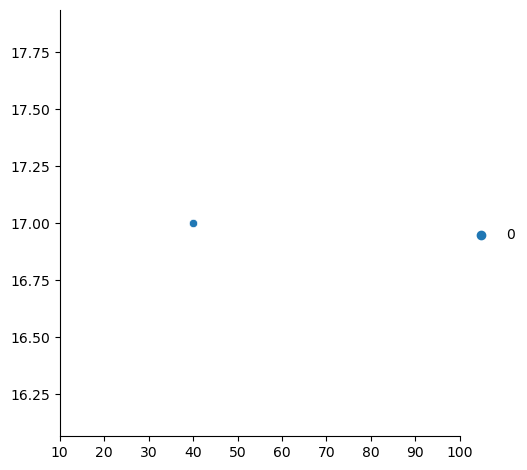

In [74]:
x = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510]

y = [10, 12, 11, 14, 16, 12, 14, 13, 15, 16, 14, 13, 12, 15, 17, 16, 18, 14, 16, 15, 13, 12, 11, 13, 14, 15, 16, 17, 15, 14, 13, 12, 18, 16, 15, 14, 13, 12, 11, 16, 17, 18, 15, 14, 13, 12, 11, 10]

x = pd.Series(x)
y = pd.Series(y)
df = pd.DataFrame(y, x)

sns.relplot(df)
plt.xlim(10, 100)

In [75]:
from pydataset import data

In [76]:
cake = data('cake')
cake

,replicate,recipe,temperature,angle,temp
1,1,A,175,42,175
2,1,A,185,46,185
3,1,A,195,47,195
4,1,A,205,39,205
5,1,A,215,53,215
...,...,...,...,...,...
266,15,C,185,28,185
267,15,C,195,25,195
268,15,C,205,25,205
269,15,C,215,31,215


In [77]:
cake.recipe.unique()

array(['A', 'B', 'C'], dtype=object)

In [78]:
cake.replicate.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

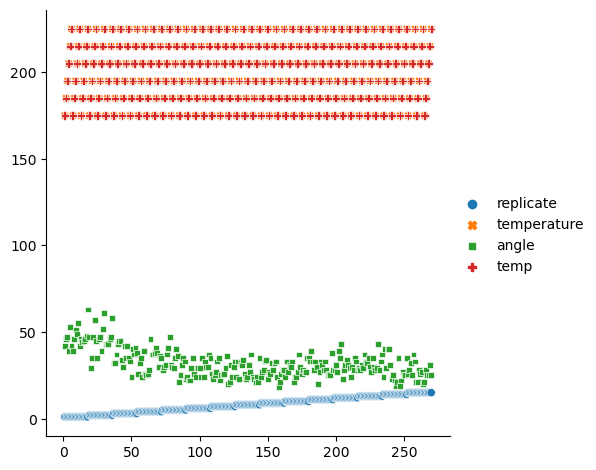

In [79]:
sns.relplot(cake)

In [81]:
observed = pd.crosstab(cake.replicate, cake.recipe)

In [82]:
chi, p, dof, expected = stats.chi2_contingency(observed)
chi, p

(0.0, 1.0)

In [85]:
type(True)

bool

In [86]:
def which_stats_test(col_one, col_two):
    if (type(col_one[1]) or (col_one.unique() == [0, 1]) or (col_one.unique() == [1, 0]) == 'str') and (type(col_two[1]) == 'str') or (type(col_two[1]) == 'int') or (type(col_two[1])):
        print('Both columns contain categorical data: use the Chi-squared test.')
        
    if (type(col_one[1]) == 'int') or (type(col_one[1]) == 'float') and (type(col_two[1]) == 'int') or (type(col_two[1])):
        print("Both columns contain numeric data: use Pearson's R test, or Spearman's if you suspect a non-linear relationship.")
   
    if type(col_one[1]) == and type(.col_two):
    if type(col_one[1]) and type(col_two):

SyntaxError: invalid syntax (2226860387.py, line 8)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

What kind of distribution is this talking about?

Does this dataset meet parametric assumptions?

What kind of stats test should I use?

In [95]:
esquire_dist = np.random.normal(40, 15,10000)

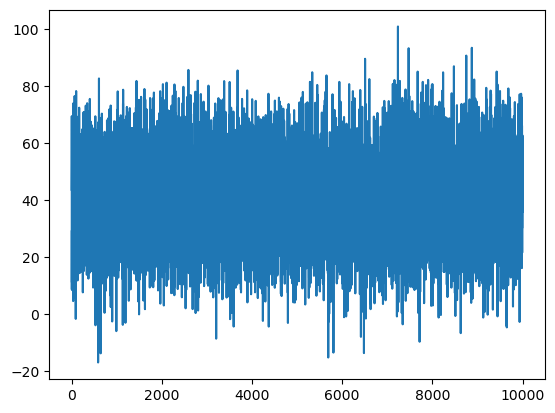

In [96]:
plt.plot(esquire_dist)

In [97]:
import scipy.stats as stats

mean_time = 40  # Mean time to order and eat the burger special (in minutes)
std_dev = 15  # Standard deviation of the time (in minutes)
walking_time = 10  # Walking time from Codeup to the restaurant (in minutes)
lunch_hour = 60  # Total duration of the lunch hour (in minutes)


calculate the normal distribution

In [98]:
esquire_walk = np.random.normal(40, 15)

In [99]:
esquire_walk

45.96390803810901

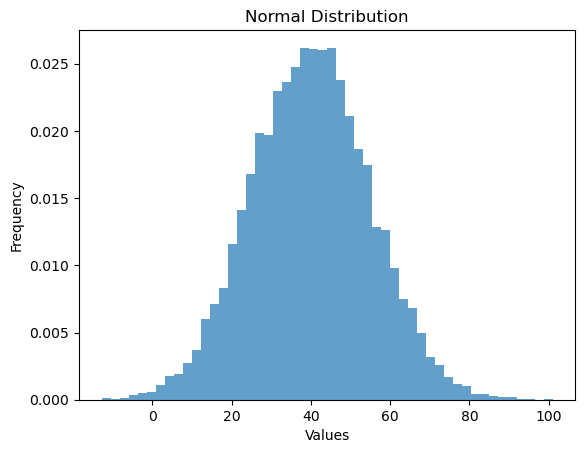

In [100]:
import numpy as np
import matplotlib.pyplot as plt

mean = 40
std_dev = 15
sample_size = 10000  # Number of samples to generate

# Generate random samples from the normal distribution
samples = np.random.normal(mean, std_dev, sample_size)

# Plot the histogram of the samples
plt.hist(samples, bins=50, density=True, alpha=0.7)

# Set x and y labels
plt.xlabel('Values')
plt.ylabel('Frequency')

# Set title
plt.title('Normal Distribution')

# Show the plot
plt.show()


In [111]:
samples = pd.Series(samples)

round(stats.norm.cdf(55, samples.mean(), samples.std()), 2)

0.84

In [110]:
import scipy.stats as stats

n = 618  # Number of observations
p = 0.1  # Probability of success

# Calculate the probability mass function (PMF) for observing 70 successes
pmf_70 = stats.binom.pmf(70, n, p)

# Calculate the cumulative distribution function (CDF) for observing 70 or fewer successes
cdf_70_or_less = stats.binom.cdf(69, n, p)

# Calculate the odds of observing 70 successes
odds_70 = pmf_70 / (1 - cdf_70_or_less)

print("Probability of observing 70 successes:", pmf_70)
print("CDF for observing 70 or fewer successes:", cdf_70_or_less)
print("Odds of observing 70 successes:", odds_70)


Probability of observing 70 successes: 0.0282555937033103
CDF for observing 70 or fewer successes: 0.8489247128979024
Odds of observing 70 successes: 0.18702988586223898
